# Python 101 @ SzISz VIII.
---
## Today: Dataframes, and visualization

### Act I: Get the data!

<img src="http://www.london24.com/polopoly_fs/1.3024317.1385128334!/image/4183113330.jpg_gen/derivatives/landscape_630/4183113330.jpg" align="left"></img>

Scrape the 2014 hungarian voting results!

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
VOTE_BASE = 'http://valasztas.hu/dyn/pv14/szavossz/hu/'
OVERALL = 'oevker.html'
BASE_URI = '../data/'

In [4]:
vote_response = requests.get(VOTE_BASE + OVERALL)
print vote_response.status_code

200


In [12]:
vote_soup = BeautifulSoup(vote_response.content, "lxml") 
containers = vote_soup.find('table', {'border': '1'}).findAll('tr')
containers[:5]

[<tr>\n<th width="20%">Megye/F\u0151v\xe1ros</th>\n<th width="4%">OEVK</th>\n<th width="16%">OEVK sz\xe9khely telep\xfcl\xe9s</th>\n<th width="25%">Az els\u0151 helyen \xe1ll\xf3 jel\xf6lt neve</th>\n<th width="29%">Jel\xf6ltet \xe1ll\xedt\xf3<br/>p\xe1rt(ok)</th>\n<th width="6%">Feldolgoz\xe1s \xe1ll\xe1sa</th>\n</tr>,
 <tr>\n<td rowspan="1">BUDAPEST</td>\n<td rowspan="1" style="text-align:center;"><a href="M01/E01/evkjkv.html">01</a></td>\n<td rowspan="1">Budapest V.ker.</td>\n<td><a href="../../vertaj/hu/J/5/9/3/j51-6178593.html"> Rog\xe1n Antal </a></td>\n<td>FIDESZ-KDNP</td>\n<td rowspan="1" style="text-align:right;">100.0 %</td>\n</tr>,
 <tr>\n<td rowspan="1">BUDAPEST</td>\n<td rowspan="1" style="text-align:center;"><a href="M01/E02/evkjkv.html">02</a></td>\n<td rowspan="1">Budapest XI.ker.</td>\n<td><a href="../../vertaj/hu/J/1/8/0/j51-2243180.html">Dr. Simicsk\xf3 Istv\xe1n </a></td>\n<td>FIDESZ-KDNP</td>\n<td rowspan="1" style="text-align:right;">100.0 %</td>\n</tr>,
 <tr>\n<t

In [13]:
# get the items out of the tablerows
rows = [row.findAll('td') for row in containers]
rows[:5]

[[],
 [<td rowspan="1">BUDAPEST</td>,
  <td rowspan="1" style="text-align:center;"><a href="M01/E01/evkjkv.html">01</a></td>,
  <td rowspan="1">Budapest V.ker.</td>,
  <td><a href="../../vertaj/hu/J/5/9/3/j51-6178593.html"> Rog\xe1n Antal </a></td>,
  <td>FIDESZ-KDNP</td>,
  <td rowspan="1" style="text-align:right;">100.0 %</td>],
 [<td rowspan="1">BUDAPEST</td>,
  <td rowspan="1" style="text-align:center;"><a href="M01/E02/evkjkv.html">02</a></td>,
  <td rowspan="1">Budapest XI.ker.</td>,
  <td><a href="../../vertaj/hu/J/1/8/0/j51-2243180.html">Dr. Simicsk\xf3 Istv\xe1n </a></td>,
  <td>FIDESZ-KDNP</td>,
  <td rowspan="1" style="text-align:right;">100.0 %</td>],
 [<td rowspan="1">BUDAPEST</td>,
  <td rowspan="1" style="text-align:center;"><a href="M01/E03/evkjkv.html">03</a></td>,
  <td rowspan="1">Budapest XII.ker.</td>,
  <td><a href="../../vertaj/hu/J/3/9/8/j51-3379398.html">Dr. F\xf3nagy J\xe1nos Vilmos</a></td>,
  <td>FIDESZ-KDNP</td>,
  <td rowspan="1" style="text-align:right;">

In [14]:
# we've got an unneeded first row, remove it!
rows = rows[1:]
rows[:5]

[[<td rowspan="1">BUDAPEST</td>,
  <td rowspan="1" style="text-align:center;"><a href="M01/E01/evkjkv.html">01</a></td>,
  <td rowspan="1">Budapest V.ker.</td>,
  <td><a href="../../vertaj/hu/J/5/9/3/j51-6178593.html"> Rog\xe1n Antal </a></td>,
  <td>FIDESZ-KDNP</td>,
  <td rowspan="1" style="text-align:right;">100.0 %</td>],
 [<td rowspan="1">BUDAPEST</td>,
  <td rowspan="1" style="text-align:center;"><a href="M01/E02/evkjkv.html">02</a></td>,
  <td rowspan="1">Budapest XI.ker.</td>,
  <td><a href="../../vertaj/hu/J/1/8/0/j51-2243180.html">Dr. Simicsk\xf3 Istv\xe1n </a></td>,
  <td>FIDESZ-KDNP</td>,
  <td rowspan="1" style="text-align:right;">100.0 %</td>],
 [<td rowspan="1">BUDAPEST</td>,
  <td rowspan="1" style="text-align:center;"><a href="M01/E03/evkjkv.html">03</a></td>,
  <td rowspan="1">Budapest XII.ker.</td>,
  <td><a href="../../vertaj/hu/J/3/9/8/j51-3379398.html">Dr. F\xf3nagy J\xe1nos Vilmos</a></td>,
  <td>FIDESZ-KDNP</td>,
  <td rowspan="1" style="text-align:right;">100.0

In [22]:
# see the data in a table-like format
for row in rows[:5]:
    print [r.getText() for r in row]

[u'BUDAPEST', u'01', u'Budapest V.ker.', u' Rog\xe1n Antal ', u'FIDESZ-KDNP', u'100.0 %']
[u'BUDAPEST', u'02', u'Budapest XI.ker.', u'Dr. Simicsk\xf3 Istv\xe1n ', u'FIDESZ-KDNP', u'100.0 %']
[u'BUDAPEST', u'03', u'Budapest XII.ker.', u'Dr. F\xf3nagy J\xe1nos Vilmos', u'FIDESZ-KDNP', u'100.0 %']
[u'BUDAPEST', u'04', u'Budapest II.ker.', u' Varga Mih\xe1ly ', u'FIDESZ-KDNP', u'100.0 %']
[u'BUDAPEST', u'05', u'Budapest VII.ker.', u'Dr. Ol\xe1h Lajos ', u'MSZP-EGY\xdcTT-DK-PM-MLP', u'100.0 %']


In [23]:
# we need the region, the subregion and the links
REGIONS = []
for row in rows:
    REGIONS.append([row[0].getText(), row[2].getText(), row[1].find('a').get('href')])
REGIONS[:5]

[[u'BUDAPEST', u'Budapest V.ker.', 'M01/E01/evkjkv.html'],
 [u'BUDAPEST', u'Budapest XI.ker.', 'M01/E02/evkjkv.html'],
 [u'BUDAPEST', u'Budapest XII.ker.', 'M01/E03/evkjkv.html'],
 [u'BUDAPEST', u'Budapest II.ker.', 'M01/E04/evkjkv.html'],
 [u'BUDAPEST', u'Budapest VII.ker.', 'M01/E05/evkjkv.html']]

In [17]:
print 'Number of regions:', len(REGIONS)

Number of regions: 106


In [20]:
results = []
# get the detailed informations
for region in REGIONS:
    region_response = requests.get(VOTE_BASE + region[2])
    region_soup = BeautifulSoup(region_response.content, "lxml")
    region_container = region_soup.find(text='A szavazatok száma jelöltenként').findNext('table').findAll('tr')
    region_rows = [row.findAll('td') for row in region_container]
    # every candidate will go to a new row
    for row in region_rows[1:]:
        results.append([region[0], region[1]] + [r.getText() for r in row][:-1]) # remove the last 'tick column'

In [19]:
# let's look at the detailed information
print results[:5]
print '-' * 79
print 'Number of candidates:', len(results)

[[u'BUDAPEST', u'Budapest V.ker.', u'\xa02\xa0', u' Sz\xf6ll\u0151si Istv\xe1nn\xe9 ', u'SZOCI\xc1LDEMOKRAT\xc1K', u'\xa0321\xa0', u'0.68 %'], [u'BUDAPEST', u'Budapest V.ker.', u'\xa03\xa0', u' Schiffer Andr\xe1s ', u'LMP', u'\xa06\xa0482\xa0', u'13.65 %'], [u'BUDAPEST', u'Budapest V.ker.', u'\xa04\xa0', u' Rog\xe1n Antal ', u'FIDESZ-KDNP', u'\xa021\xa0503\xa0', u'45.29 %'], [u'BUDAPEST', u'Budapest V.ker.', u'\xa05\xa0', u' Heged\u0171s L\xf3r\xe1nt G\xe9z\xe1n\xe9', u'JOBBIK', u'\xa03\xa0713\xa0', u'7.82 %'], [u'BUDAPEST', u'Budapest V.ker.', u'\xa06\xa0', u' Ker\xe9k-B\xe1rczy Szabolcs ', u'MSZP-EGY\xdcTT-DK-PM-MLP', u'\xa015\xa0459\xa0', u'32.56 %']]
-------------------------------------------------------------------------------
Number of candidates: 1558


In [24]:
cleaned_results =[]
# We have to transform the items
for row in results:
    cleaned_results.append(
        [item.replace(u'\xa0', u'').replace(u'%', u'').strip() # replace the unneeded characters
         for item in row]
    )

In [25]:
cleaned_results[:5]

[[u'BUDAPEST',
  u'Budapest V.ker.',
  u'2',
  u'Sz\xf6ll\u0151si Istv\xe1nn\xe9',
  u'SZOCI\xc1LDEMOKRAT\xc1K',
  u'321',
  u'0.68'],
 [u'BUDAPEST',
  u'Budapest V.ker.',
  u'3',
  u'Schiffer Andr\xe1s',
  u'LMP',
  u'6482',
  u'13.65'],
 [u'BUDAPEST',
  u'Budapest V.ker.',
  u'4',
  u'Rog\xe1n Antal',
  u'FIDESZ-KDNP',
  u'21503',
  u'45.29'],
 [u'BUDAPEST',
  u'Budapest V.ker.',
  u'5',
  u'Heged\u0171s L\xf3r\xe1nt G\xe9z\xe1n\xe9',
  u'JOBBIK',
  u'3713',
  u'7.82'],
 [u'BUDAPEST',
  u'Budapest V.ker.',
  u'6',
  u'Ker\xe9k-B\xe1rczy Szabolcs',
  u'MSZP-EGY\xdcTT-DK-PM-MLP',
  u'15459',
  u'32.56']]

Now we can finally save it!

In [26]:
import codecs
header = [u'region', u'subregion', u'subid', u'name', u'party', u'votes', u'votes %']
filename = 'vote2014.csv'
with codecs.open(BASE_URI + filename, 'w', 'utf-8') as csv:
    csv.write(u';'.join([u'"' + item + u'"' for item in header]) + u'\n')
    for row in cleaned_results:
        csv.write(u';'.join([u'"' + item + u'"' for item in row]) + u'\n')

# check if it is successfully created
import os
os.path.isfile(BASE_URI + filename)

True

---
### Act II: Use the pandas, Luke!

<img src="http://bconnelly.net/assets/img/pandas1.png" align="left">

In [27]:
# import pandas! 
import pandas as pd

In [29]:
#read in the data into a dataframe
data = pd.read_csv(BASE_URI + filename, quotechar='"', delimiter=';', encoding='utf-8')

In [30]:
# show the first 5 rows
data.head()

,region,subregion,subid,name,party,votes,votes %
0,BUDAPEST,Budapest V.ker.,2,Szöllősi Istvánné,SZOCIÁLDEMOKRATÁK,321,0.68
1,BUDAPEST,Budapest V.ker.,3,Schiffer András,LMP,6482,13.65
2,BUDAPEST,Budapest V.ker.,4,Rogán Antal,FIDESZ-KDNP,21503,45.29
3,BUDAPEST,Budapest V.ker.,5,Hegedűs Lóránt Gézáné,JOBBIK,3713,7.82
4,BUDAPEST,Budapest V.ker.,6,Kerék-Bárczy Szabolcs,MSZP-EGYÜTT-DK-PM-MLP,15459,32.56


In [31]:
# we don't need the subid
del data['subid']

In [32]:
# check the results
data[:5]

,region,subregion,name,party,votes,votes %
0,BUDAPEST,Budapest V.ker.,Szöllősi Istvánné,SZOCIÁLDEMOKRATÁK,321,0.68
1,BUDAPEST,Budapest V.ker.,Schiffer András,LMP,6482,13.65
2,BUDAPEST,Budapest V.ker.,Rogán Antal,FIDESZ-KDNP,21503,45.29
3,BUDAPEST,Budapest V.ker.,Hegedűs Lóránt Gézáné,JOBBIK,3713,7.82
4,BUDAPEST,Budapest V.ker.,Kerék-Bárczy Szabolcs,MSZP-EGYÜTT-DK-PM-MLP,15459,32.56


In [33]:
# How many people voted?
data['votes'].sum()

4908608

In [38]:
# let's get the sum of the votes for each party!
data.groupby('party').sum()

,votes,votes %
party,,
4K!,1897,3.68
A HAZA NEM ELADÓ,23037,50.53
A VÁLASZ,239,0.47
AQP,363,0.78
EGYIKSEM,71,0.16
EGYÜTT 2014,6361,13.54
EP,1362,2.75
EU. ROM,637,1.41
EURÓPAI BALOLDAL,390,0.83


In [39]:
# Cool! Order it by the number of votes!
party_votes = data[['party', 'votes']].groupby('party').sum().sort('votes', ascending=False)
party_votes

,votes
party,
FIDESZ-KDNP,2165342
MSZP-EGYÜTT-DK-PM-MLP,1317879
JOBBIK,1000637
LMP,244191
A HAZA NEM ELADÓ,23037
SMS,20229
JESZ,13051
Független,12850
MUNKÁSPÁRT,12712


In [40]:
len(data['party'].unique())

54

#### Let's draw!

In [48]:
# use this `ipython magic` to draw the plots into the notebook
%matplotlib inline
# main plotting lib
import matplotlib.pyplot as plt
# make the plots nicer
try:
    import seaborn as sns
except:
    try:
        !pip install seaborn
    except:
        print 'Shit happens...'

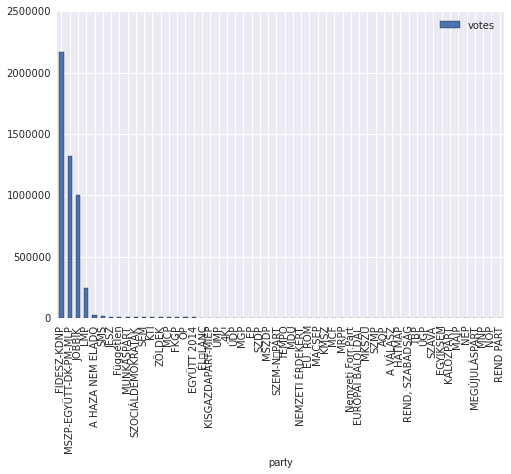

In [43]:
party_votes.plot(kind='bar')

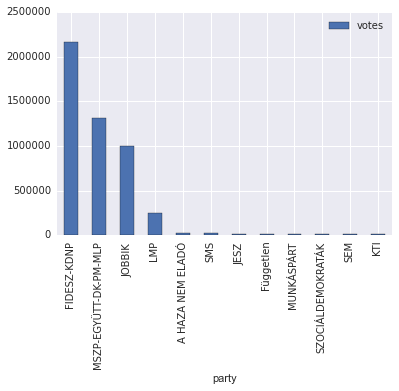

In [45]:
# Allright, let's get the ones with at least 10000 votes4
vote10k = party_votes[(party_votes['votes'] > 10000)]
vote10k.plot(kind='bar')

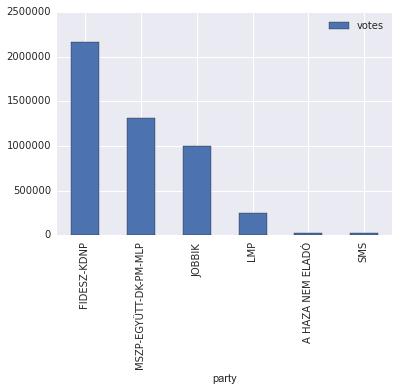

In [46]:
# Let's get the top 6!
top6 = party_votes.head(6)
top6.plot(kind='bar')

---
### Act III: The devil lies in the details!

<img src="http://searchenginewatch.com/IMG/892/265892/panda-devil.png" width=300 height=300 align="left">

In [50]:
# Let's use the regional data too!
regional = data[['party', 'region', 'votes']].groupby(['region', 'party']).sum()
regional

votes
region   party                       
BARANYA  A HAZA NEM ELADÓ        1691
         EGYIKSEM                  71
         EU. ROM                   69
         EURÓPAI BALOLDAL         117
         FIDESZ-KDNP            77456
         FKGP                     476
         Független                865
         HATMAP                    51
         JESZ                     572
         JOBBIK                 35528
         KMSZ                     125
         KTI                      995
         LMP                    11468
         MACSEP                    38
         MCF                        0
         MCP                      305
         MDU                       25
         MGP                       63
         MRPP                      45
         MSZP-EGYÜTT-DK-PM-MLP  53154
         MUNKÁSPÁRT               332
         REND, SZABADSÁG            0
         SEM                      868
         SMS                      497
         SZAVA                     48
         SZMP                      40
         SZOCIÁLDEMOKRATÁK        679
         TEMPO                    173
         ÖP                       235
         ÚDP                       70
...                               ...
VESZPRÉM ÚDP                      147
         ÚGP                       87
         ÚMP                      166
ZALA     A HAZA NEM ELADÓ         595
         AQP                       69
         EP                       230
         FIDESZ-KDNP            63446
         FKGP                     739
         Független               1382
         HATMAP                    35
         JESZ                     301
         JOBBIK                 34543
         KTI                      174
         LMP                     5504
         MCP                      461
         MDU                       31
         MGP                       59
         MRPP                      58
         MSZDP                     54
         MSZP-EGYÜTT-DK-PM-MLP  33348
         NOP                       18
         REND, SZABADSÁG           29
         SEM                      299
         SMS                      993
         SZAVA                     25
         SZMP                     117
         SZOCIÁLDEMOKRATÁK        133
         ÖP                        98
         ÚDP                       78
         ÚMP                      142

[526 rows x 1 columns]

In [51]:
# Let's only have the ones with more than 5000 votes!
regional5k = regional[regional['votes'] > 5000]
regional5k

votes
region                 party                        
BARANYA                FIDESZ-KDNP             77456
                       JOBBIK                  35528
                       LMP                     11468
                       MSZP-EGYÜTT-DK-PM-MLP   53154
BORSOD–ABAÚJ–ZEMPLÉN   FIDESZ-KDNP            124536
                       JOBBIK                  92522
                       LMP                      7823
                       MSZP-EGYÜTT-DK-PM-MLP   81172
BUDAPEST               FIDESZ-KDNP            361888
                       JOBBIK                 108436
                       LMP                     73490
                       MSZP-EGYÜTT-DK-PM-MLP  349890
BÁCS–KISKUN            FIDESZ-KDNP            124842
                       JOBBIK                  50266
                       LMP                     10021
                       MSZP-EGYÜTT-DK-PM-MLP   50369
BÉKÉS                  FIDESZ-KDNP             78410
                       JOBBIK                  38213
                       LMP                      6842
                       MSZP-EGYÜTT-DK-PM-MLP   40202
CSONGRÁD               FIDESZ-KDNP             83220
                       JOBBIK                  39057
                       LMP                     12537
                       MSZP-EGYÜTT-DK-PM-MLP   56607
FEJÉR                  FIDESZ-KDNP             96752
                       JOBBIK                  46487
                       LMP                     10099
                       MSZP-EGYÜTT-DK-PM-MLP   49265
GYŐR–MOSON–SOPRON      FIDESZ-KDNP            118018
                       JOBBIK                  39130
...                                              ...
NÓGRÁD                 JOBBIK                  22755
                       MSZP-EGYÜTT-DK-PM-MLP   23498
PEST                   FIDESZ-KDNP            273587
                       JOBBIK                 115821
                       LMP                     34903
                       MSZP-EGYÜTT-DK-PM-MLP  161475
SOMOGY                 FIDESZ-KDNP             68638
                       JOBBIK                  33499
                       LMP                      5572
                       MSZP-EGYÜTT-DK-PM-MLP   37638
SZABOLCS–SZATMÁR–BEREG FIDESZ-KDNP            122665
                       JOBBIK                  70169
                       LMP                      5153
                       MSZP-EGYÜTT-DK-PM-MLP   57000
TOLNA                  FIDESZ-KDNP             51830
                       JOBBIK                  24426
                       LMP                      6571
                       MSZP-EGYÜTT-DK-PM-MLP   25751
VAS                    FIDESZ-KDNP             67675
                       JOBBIK                  23860
                       LMP                      5885
                       MSZP-EGYÜTT-DK-PM-MLP   30937
VESZPRÉM               FIDESZ-KDNP             83864
                       JOBBIK                  36615
                       LMP                      7700
                       MSZP-EGYÜTT-DK-PM-MLP   46691
ZALA                   FIDESZ-KDNP             63446
                       JOBBIK                  34543
                       LMP                      5504
                       MSZP-EGYÜTT-DK-PM-MLP   33348

[79 rows x 1 columns]

In [59]:
# We need to convert it into a plottable format
# pivot table
regional5k.stack()

region                  party                       
BARANYA                 FIDESZ-KDNP            votes     77456
                        JOBBIK                 votes     35528
                        LMP                    votes     11468
                        MSZP-EGYÜTT-DK-PM-MLP  votes     53154
BORSOD–ABAÚJ–ZEMPLÉN    FIDESZ-KDNP            votes    124536
                        JOBBIK                 votes     92522
                        LMP                    votes      7823
                        MSZP-EGYÜTT-DK-PM-MLP  votes     81172
BUDAPEST                FIDESZ-KDNP            votes    361888
                        JOBBIK                 votes    108436
                        LMP                    votes     73490
                        MSZP-EGYÜTT-DK-PM-MLP  votes    349890
BÁCS–KISKUN             FIDESZ-KDNP            votes    124842
                        JOBBIK                 votes     50266
                        LMP                    votes     10021
  

In [60]:
# then unpivot subtable
regional5k.stack().unstack('party')

,party,FIDESZ-KDNP,JOBBIK,LMP,MSZP-EGYÜTT-DK-PM-MLP
region,,,,,
BARANYA,votes,77456,35528,11468,53154
BORSOD–ABAÚJ–ZEMPLÉN,votes,124536,92522,7823,81172
BUDAPEST,votes,361888,108436,73490,349890
BÁCS–KISKUN,votes,124842,50266,10021,50369
BÉKÉS,votes,78410,38213,6842,40202
CSONGRÁD,votes,83220,39057,12537,56607
FEJÉR,votes,96752,46487,10099,49265
GYŐR–MOSON–SOPRON,votes,118018,39130,11099,50600
HAJDÚ–BIHAR,votes,116917,60668,9371,51277


In [61]:
plt.rcParams['figure.figsize'] = 8, 6

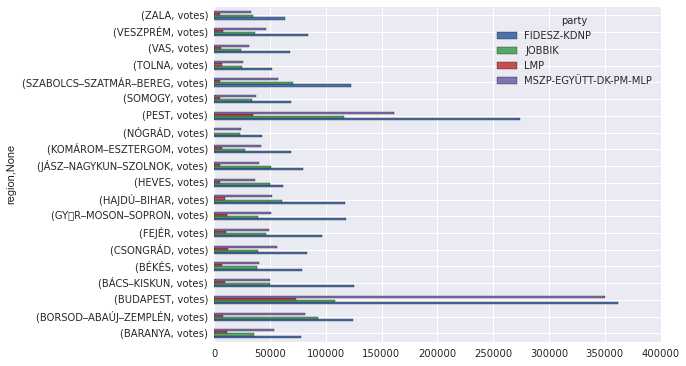

In [62]:
# that looks like something plottable!
regional5k.stack().unstack('party').plot(kind='barh')

---
### Final Act: The pandas is strong with this one! 

<img src="http://2.bp.blogspot.com/-pgK8KdMmSn8/TsFTOwrGk9I/AAAAAAAABAk/5ondVGyw6w8/s320/Darth+Panda.jpg" align="left">

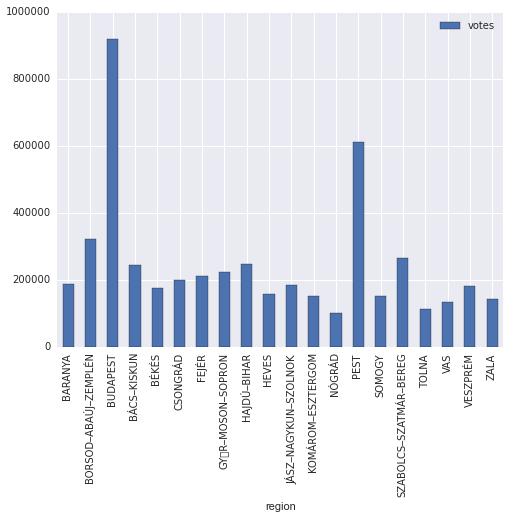

In [63]:
# Plot the number of voters in each region!
data[['region', 'votes']].groupby('region').sum().plot(kind='bar')

In [64]:
# Who would win, if Fidesz doesn't participate in the election?
data_parties = (data[['party', 'votes']][data['party'] != "FIDESZ-KDNP"]
    .groupby('party')
    .sum()
    .sort(columns=['votes'], ascending=False))
data_parties[data_parties['votes'] == data_parties.values.max()]

,votes
party,
MSZP-EGYÜTT-DK-PM-MLP,1317879


In [71]:
# Who would win by regions, if Fidesz doesn't participate in the election?
data_parties_2 = (data[['party', 'region', 'votes']][data['party'] != "FIDESZ-KDNP"]
    .groupby(['region', 'party'])
    .sum())

In [72]:
data_parties_2

votes
region   party                       
BARANYA  A HAZA NEM ELADÓ        1691
         EGYIKSEM                  71
         EU. ROM                   69
         EURÓPAI BALOLDAL         117
         FKGP                     476
         Független                865
         HATMAP                    51
         JESZ                     572
         JOBBIK                 35528
         KMSZ                     125
         KTI                      995
         LMP                    11468
         MACSEP                    38
         MCF                        0
         MCP                      305
         MDU                       25
         MGP                       63
         MRPP                      45
         MSZP-EGYÜTT-DK-PM-MLP  53154
         MUNKÁSPÁRT               332
         REND, SZABADSÁG            0
         SEM                      868
         SMS                      497
         SZAVA                     48
         SZMP                      40
         SZOCIÁLDEMOKRATÁK        679
         TEMPO                    173
         ÖP                       235
         ÚDP                       70
         ÚMP                       86
...                               ...
VESZPRÉM ÖP                       391
         ÚDP                      147
         ÚGP                       87
         ÚMP                      166
ZALA     A HAZA NEM ELADÓ         595
         AQP                       69
         EP                       230
         FKGP                     739
         Független               1382
         HATMAP                    35
         JESZ                     301
         JOBBIK                 34543
         KTI                      174
         LMP                     5504
         MCP                      461
         MDU                       31
         MGP                       59
         MRPP                      58
         MSZDP                     54
         MSZP-EGYÜTT-DK-PM-MLP  33348
         NOP                       18
         REND, SZABADSÁG           29
         SEM                      299
         SMS                      993
         SZAVA                     25
         SZMP                     117
         SZOCIÁLDEMOKRATÁK        133
         ÖP                        98
         ÚDP                       78
         ÚMP                      142

[506 rows x 1 columns]